In [1]:
%load_ext autoreload
%autoreload 2

In [6]:
import sys
sys.path.append('..')
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


####
deadband: 50
cutoff: 160
cx: 664105.9876120769
a: 1.4970875488184987e-06
dcdt: 0.9934310012099394
####
####
deadband: 40
cutoff: 140
cx: 753066.1553910918
a: 1.3224306154580034e-06
dcdt: 0.9951965189187887
####
####
deadband: 40
cutoff: 140
cx: 510796.76869621006
a: 1.9485881537217864e-06
dcdt: 0.9943283712025898
####
####
deadband: 50
cutoff: 170
cx: 483790.0439300439
a: 2.054818468710806e-06
dcdt: 0.9930010044306158
####
Results: dict_keys(['2025-5-8_16-37-56'])
####
deadband: 40
cutoff: 150
cx: 1269406.7639357862
a: 7.856768700076344e-07
dcdt: 0.9969348718995431
####


In [ ]:
from soilgasflux_fcs import multiprocess_raw_data, json_reader, fcs
from soilgasflux_fcs import synthetic_postProcessing
import pathlib
import matplotlib.pyplot as plt
import xarray as xr

####
deadband: 40
cutoff: 150
cx: 343543.9757006635
a: 2.8981392328208955e-06
dcdt: 0.9941303860260493
####


####
deadband: 40
cutoff: 160
cx: 961934.8570172339
a: 1.036551527722196e-06
dcdt: 0.9965507371720863
####
####
deadband: 40
cutoff: 160
cx: 1773958.0355280575
a: 5.625251908725204e-07
dcdt: 0.9976005642071287
####
####
deadband: 40
cutoff: 170
cx: 507858.08469443594
a: 1.9629678402743878e-06
dcdt: 0.9958685534671562
####


In [ ]:
data_path = pathlib.Path(r'/Users/alexnaokiasatokobayashi/Documents/FCS/raw_data/test06')
# data_path = pathlib.Path(r'/Users/alexnaokiasatokobayashi/Documents/FCS/raw_data/temp')
a = json_reader.Initializer(folderPath=data_path)
df = a.prepare_rawdata()

####
deadband: 50
cutoff: 110
cx: 1397.2395520322718
a: 0.001110490116206897
dcdt: 0.9906797160780069
####
####
deadband: 40
cutoff: 170
cx: 1566508.7562512157
a: 6.370982463810293e-07
dcdt: 0.997682108203858
####


####
deadband: 50
cutoff: 110
cx: 6388.084554025732
a: 0.00016907195697490884
dcdt: 0.9946132344643495
####
####
deadband: 50
cutoff: 120
cx: 129472.52034690307
a: 7.714470032338383e-06
dcdt: 0.9948764512011099
####
####
deadband: 50
cutoff: 130
cx: 21069.718500850613
a: 4.8341842489474374e-05
dcdt: 0.9936487415151843
####
####
deadband: 50
cutoff: 120
cx: 479484.3086892422
a: 2.0855169997613388e-06
dcdt: 0.9989083616508262
####
####
deadband: 50
cutoff: 140
cx: 523202.8203959053
a: 1.9053308475402986e-06
dcdt: 0.9958835221662387
####
####
deadband: 50
cutoff: 130
cx: 346903.1823723228
a: 2.8811388295135743e-06
dcdt: 0.9979915348918549
####
####
deadband: 50
cutoff: 140
cx: 11204.013919885341
a: 9.32352282017046e-05
dcdt: 0.9961010559701852
####
####
deadband: 50
cutoff: 150
cx: 8837.576142188047
a: 0.0001197652058215759
dcdt: 0.9955281314601336
####
####
deadband: 50
cutoff: 150
cx: 919200.6002931618
a: 1.0861589709865171e-06
dcdt: 0.9978276241999037
####
####
deadband: 50
cutoff: 160

In [9]:
a = multiprocess_raw_data.Multiprocessor()
# b = a.run(df=df, chamber_id='test07_noNorm_ln_v2test4', output_folder=r'/Users/alexnaokiasatokobayashi/Documents/FCS/processed_data')
b = a.run(df=df, chamber_id='test06_noNorm_test5', output_folder=r'/Users/alexnaokiasatokobayashi/Documents/FCS/processed_data_v4')

Multiprocessing started
CPU core count: 14


Date: 2025-05-08
Processing ID: 2025-5-8_15-31-56
Processing ID: 2025-5-8_15-40-56
Processing ID: 2025-5-8_15-25-56
####
deadband: 0
cutoff: 60
cx: 442.78033396019936
a: 0.009382788308546441
dcdt: 0.0980739923195467
####
Processing ID: 2025-5-8_15-28-56
Processing ID: 2025-5-8_15-34-56
Processing ID: 2025-5-8_15-49-56
Processing ID: 2025-5-8_15-58-56
Processing ID: 2025-5-8_15-37-56
Processing ID: 2025-5-8_15-46-56
####
deadband: 0
cutoff: 60
cx: 463.06493014828993
a: 0.002857543082892988
dcdt: 0.08804859758278923
####
Processing ID: 2025-5-8_15-22-56
####
deadband: 0
cutoff: 60
cx: 295164.91173158435
a: 3.6481600429461025e-07
dcdt: 0.10752296972400717
####
####
deadband: 0
cutoff: 60
cx: 264335.3759589068
a: 3.7819744980183145e-07
dcdt: 0.09980740012996922
####
Processing ID: 2025-5-8_16-1-56
Processing ID: 2025-5-8_15-43-56
Processing ID: 2025-5-8_15-55-56
####
deadband: 0
cutoff: 60
cx: 442.9266242359991
a: 0.009025739079210116
dcdt: 0.09495908318613328
####
####
deadband: 0
cutoff:

In [10]:
c = multiprocess_raw_data.Multiprocessor()
d = c.run_MC(df=df, chamber_id='test06_MC_noNorm_test5', output_folder=r'/Users/alexnaokiasatokobayashi/Documents/FCS/processed_data_v4')

Multiprocessing started
CPU core count: 14
Date: 2025-05-08
Processing ID: 2025-5-8_15-34-56
Processing ID: 2025-5-8_15-31-56
Processing ID: 2025-5-8_15-25-56
####
deadband: 0
cutoff: 60
cx: 84519.66644208838
a: 1.1636155674565885e-06
dcdt_bf: [0.09784485]
Processing ID: 2025-5-8_15-58-56
Processing ID: 2025-5-8_15-22-56
Processing ID: 2025-5-8_15-28-56
####
deadband: 0
cutoff: 60
cx: 442.78033396019936
a: 0.009382788308546441
dcdt_bf: [0.0967911]
Processing ID: 2025-5-8_15-52-56
Processing ID: 2025-5-8_15-55-56
Processing ID: 2025-5-8_15-40-56
####
deadband: 0
cutoff: 60
cx: ####
deadband: 0
cutoff: 60
cx: 264335.3759589068
a: 3.7819744980183145e-07
dcdt_bf: [0.0998074]
439.6977770087105
a: 0.014349085768111447
dcdt_bf: Processing ID: 2025-5-8_16-1-56
[0.09579113]
Processing ID: 2025-5-8_15-49-56
Processing ID: 2025-5-8_15-37-56
####
deadband: 0
cutoff: 60
cx: 464.90699000332506
a: 0.0032959804711867324
dcdt_bf: [0.10641564]
Processing ID: 2025-5-8_15-43-56
Processing ID: 2025-5-8_15-

cx_MC: 667782.1563355791 | 5566.414396542818 | 26903961.869988438
a_MC: 1.6545668898725052e-07 | 3.872884490072907e-09 | 1.8622066919335588e-05
t0_MC: 2.624172352587988 | -1.4747865978421135 | 5.523027490562825
dcdt_fromMedian [0.11041742 0.11041739 0.11041742 ... 0.11041737 0.11041735 0.11041738]
dcdtMC: 0.10815387065603567 | 0.09559625144938462 | 0.118712619459119
####
cx_MC: 343248.33379128354 | 3416.675115369071 | 6643228.8612340195
a_MC: 2.9376070758038007e-07 | 1.5591840889450237e-08 | 3.15937467883126e-05
t0_MC: 4.2525077114556575 | 0.2912273854199432 | 7.527049082711325
dcdt_fromMedian [0.10070572 0.10070567 0.10070577 ... 0.10070578 0.10070578 0.10070583]
dcdtMC: 0.10227442640525179 | 0.08991603592843778 | 0.11249239905374217
####
####
deadband: 0
cutoff: 70
cx: 271724.3999010592
a: 4.02136671073805e-07
dcdt_bf: [0.10909605]
cx_MC: 208093.89933536787 | 855.5663953329204 | 2673257.327616335
a_MC: 3.8900825864808666e-07 | 2.8622925279986393e-08 | 2.8324218986021664e-05
t0_MC: -0

Traceback (most recent call last):
  File "/Users/alexnaokiasatokobayashi/git/soilgasflux_fcs/notebooks/../soilgasflux_fcs/fcs.py", line 141, in run_MC
    hm_results = hm.calculate_MC(deadband=deadband, cutoff=cutoff, n=n_MC)
  File "/Users/alexnaokiasatokobayashi/git/soilgasflux_fcs/notebooks/../soilgasflux_fcs/hm_model.py", line 221, in calculate_MC
    cx = result_fit['parameters_best_fit']['cx']
TypeError: 'NoneType' object is not subscriptable


Processing ID: 2025-5-8_16-4-56
####
deadband: 0
cutoff: 60
cx: 1134.6784412274376
a: 0.0007711119266413657
dcdt_bf: [0.53228447]
cx_MC: 1320.4294992846942 | 474.37825242281735 | 23635.462743724365
a_MC: 0.00012354936621964066 | 4.480198209380625e-06 | 0.003071608480359241
t0_MC: 3.569653854859758 | -4.7720419344942 | 14.242342686243267
dcdt_fromMedian [0.10874078 0.10879157 0.10880575 ... 0.10883813 0.10875907 0.10880649]
dcdtMC: 0.10846795128291155 | 0.10087510312051971 | 0.11569663077990258
####
cx_MC: 541.3518224552108 | 72.81174371551288 | 5781.928751355092
a_MC: 0.000886066039473901 | 1.8917037045524938e-05 | 0.005798243392269418
t0_MC: 1.300299126988158 | -8.595908142996894 | 603.1165895733166
dcdt_fromMedian [0.0918428  0.09213733 0.09366095 ... 0.09211176 0.09219147 0.0920409 ]
dcdtMC: 0.10148335484427763 | -0.026996394431561783 | 0.11359474491616484
####
####
deadband: 50
cutoff: 150
cx: 687.8304806991399
a: 0.0004376876833354082
dcdt_bf: [0.108263]
####
deadband: 50
cutoff: 

Traceback (most recent call last):
  File "/Users/alexnaokiasatokobayashi/git/soilgasflux_fcs/notebooks/../soilgasflux_fcs/fcs.py", line 141, in run_MC
    hm_results = hm.calculate_MC(deadband=deadband, cutoff=cutoff, n=n_MC)
  File "/Users/alexnaokiasatokobayashi/git/soilgasflux_fcs/notebooks/../soilgasflux_fcs/hm_model.py", line 221, in calculate_MC
    cx = result_fit['parameters_best_fit']['cx']
TypeError: 'NoneType' object is not subscriptable


cx_MC: 2425332.167975499 | 126160.31170298831 | 47250184.60636663
a_MC: 4.7224194813574235e-07 | 2.4130397417093217e-08 | 9.100875478153981e-06
t0_MC: 1.1287918954758551 | 0.7421247495825594 | 1.4814555685176842
dcdt_fromMedian [1.14512626 1.14512617 1.14512626 ... 1.14512612 1.14512605 1.14512621]
dcdtMC: 1.1440121541164867 | 1.130037190306079 | 1.1562537671308317
####
####
deadband: 0
cutoff: 70
cx: 3088.5006562291746
a: 0.00043273975196633785
dcdt_bf: [1.1347774]
cx_MC: 1404.7359192392405 | 488.9837711844817 | 10628.931605946376
a_MC: 0.0005553326112582132 | 5.1747511767297855e-05 | 0.015664862251852353
t0_MC: 1.2740450217067139 | 0.35672059062610806 | 7.065487108316634
dcdt_fromMedian [0.52751212 0.52755788 0.52763831 ... 0.527426   0.52751075 0.52738001]
dcdtMC: 0.5293198147694409 | 0.481406246486661 | 0.5340113623956071
####
####
deadband: 0
cutoff: 110
cx: 1342.0850092081432
a: 0.0005973095648312832
dcdt_bf: [0.5282335]
Processing ID: 2025-5-8_16-37-56
####
deadband: 0
cutoff: 6

Traceback (most recent call last):
  File "/Users/alexnaokiasatokobayashi/git/soilgasflux_fcs/notebooks/../soilgasflux_fcs/fcs.py", line 141, in run_MC
    hm_results = hm.calculate_MC(deadband=deadband, cutoff=cutoff, n=n_MC)
  File "/Users/alexnaokiasatokobayashi/git/soilgasflux_fcs/notebooks/../soilgasflux_fcs/hm_model.py", line 221, in calculate_MC
    cx = result_fit['parameters_best_fit']['cx']
TypeError: 'NoneType' object is not subscriptable


cx_MC: 55076.32562131913 | 9121.624285724189 | 14352532.138649743
a_MC: 1.8231955488544014e-05 | 6.896352217082356e-08 | 0.00011522926503853846
t0_MC: 2.1456170825365293 | 1.5885109652685192 | 9.852913226542857
dcdt_fromMedian [0.99439235 0.9943877  0.99452756 ... 0.99438693 0.99439365 0.99438369]
dcdtMC: 0.9935953605479976 | 0.9893940035673138 | 1.0651059239151555
####
Results: dict_keys(['2025-5-8_16-25-56'])
cx_MC: 2517698.2960206005 | 393177.08085485676 | 128468376.49010876
a_MC: 3.877916274419711e-07 | 7.570859389016352e-09 | 2.4974836477052395e-06
t0_MC: 1.5501524236724666 | 1.1436760962413903 | 2.0202203707996866
dcdt_fromMedian [0.97616556 0.97616558 0.97616563 ... 0.97616551 0.97616555 0.97616556]
dcdtMC: 0.9764391315996128 | 0.9638260905958506 | 0.9908089037778942
####
####
deadband: 0
cutoff: 70
cx: 7670629.58188507
a: 1.2834469753641997e-07
dcdt_bf: [0.98442549]
cx_MC: 3758.4920614800067 | 563.1517483074007 | 6449.818068397163
a_MC: 0.0002995123360997297 | 0.000164874589246

In [30]:
expected_synthetic = synthetic_postProcessing.Synthetic(processed_data=r'/Users/alexnaokiasatokobayashi/Documents/FCS/processed_data/test05_2025-05-08.nc',
                                                      raw_dataFolder=data_path)
expected_results = expected_synthetic.get_expectedResults()

test05_2025-05-08.nc
Synthetic initialized
             datetime         datetime_utc    k30_co2  bmp_pressure  \
0 2025-05-08 15:22:56  2025-05-08 15:22:56  432.48287       99000.0   

   bmp_temperature  si_humidity  si_temperature                 id  timedelta  \
0             20.0         70.0            20.0  2025-5-8_15-22-56          0   

      alpha     c_s  c_c0  deadband  disturbance_intensity  \
0  0.000187  1000.0   430         0                      0   

   disturbance_starting_point  add_noise curvature         id_datetime  
0                           0      False       big 2025-05-08 15:22:56  
             datetime         datetime_utc     k30_co2  bmp_pressure  \
0 2025-05-08 15:25:56  2025-05-08 15:25:56  428.759955       99000.0   

   bmp_temperature  si_humidity  si_temperature                 id  timedelta  \
0             20.0         70.0            20.0  2025-5-8_15-25-56          0   

     alpha      c_s  c_c0  deadband  disturbance_intensity  \
0  0.00001

In [31]:
expected_results.to_netcdf(r'/Users/alexnaokiasatokobayashi/Documents/FCS/processed_data_v2/expected_test05_2025-05-08.nc')

cx_MC: 6874184.199375907 | 447249.24182101456 | 323321660.85844463
a_MC: 1.4002395295539133e-07 | 3.946328906676587e-09 | 2.154752054492144e-06
t0_MC: 8.050250579452845 | 8.041351498488133 | 20.1607895032029
dcdt_fromMedian [0.96248729 0.96248729 0.96248729 ... 0.96248734 0.96248729 0.96248729]
dcdtMC: 0.9625951176540234 | 0.9623152693195698 | 1.2912282260023757
####
cx_MC: 1489387.3358091093 | 51245.95729449493 | 245323624.4367226
a_MC: 2.874924921362395e-07 | 1.8063643388818216e-09 | 8.739642077727536e-06
t0_MC: 9.295403621934916 | 8.936409756832925 | 94.63610723895746
dcdt_fromMedian [0.42806137 0.42806137 0.42806137 ... 0.42806137 0.42806137 0.42806137]
dcdtMC: 0.44395787425025246 | 0.0002945404841006814 | 0.5687756939314564
####
cx_MC: 26614689.068833843 | 185758.63689030512 | 96494996.17017479
a_MC: 3.287403299535103e-08 | 9.06648992239308e-09 | 4.7146920139252154e-06
t0_MC: 8.524402506399573 | 8.485774103453119 | 9.384848027580817
dcdt_fromMedian [0.87491744 0.87491744 0.8749174

In [ ]:
ds = xr.open_dataset('/Users/alexnaokiasatokobayashi/Documents/FCS/processed_data/test05_MC_2025-05-08.nc')
# ds = xr.open_dataset('/Users/alexnaokiasatokobayashi/Documents/FCS/processed_data/synthetic_test07_mc2_2025-05-08.nc')

In [ ]:
ds.isel(time=20, cutoff=3, deadband=1)['dcdt(HM)'].values

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

In [ ]:
#ds = xr.open_dataset('./output/synthetic_test03_2025-03-31.nc')
#ds = xr.open_dataset('./output/expected_synthetic_test04_01_2025-03-31.nc')
ds = xr.open_dataset('./output/synthetic_test03_1000log1_mc_2025-03-31.nc')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/alexnaokiasatokobayashi/git/soilgasflux_fcs/notebooks/output/synthetic_test03_1000log1_mc_2025-03-31.nc'

In [ ]:
ds

<xarray.Dataset> Size: 178MB
Dimensions:        (time: 45, cutoff: 15, deadband: 6, MC: 1000)
Coordinates:
  * time           (time) datetime64[ns] 360B 2025-03-31T18:09:27 ... 2025-03...
  * deadband       (deadband) int32 24B 0 10 20 30 40 50
  * cutoff         (cutoff) int32 60B 30 40 50 60 70 80 ... 130 140 150 160 170
  * MC             (MC) int32 4kB 0 1 2 3 4 5 6 ... 993 994 995 996 997 998 999
Data variables:
    dcdt(HM)       (time, cutoff, deadband, MC) float32 16MB ...
    dcdt(linear)   (time, cutoff, deadband, MC) float32 16MB ...
    AIC(HM)        (time, cutoff, deadband, MC) float32 16MB ...
    AIC(linear)    (time, cutoff, deadband, MC) float32 16MB ...
    RMSE(HM)       (time, cutoff, deadband, MC) float32 16MB ...
    RMSE(linear)   (time, cutoff, deadband, MC) float32 16MB ...
    R2(HM)         (time, cutoff, deadband, MC) float32 16MB ...
    R2(linear)     (time, cutoff, deadband, MC) float32 16MB ...
    nRMSE(HM)      (time, cutoff, deadband, MC) float32 16MB ...
    nRMSE(linear)  (time, cutoff, deadband, MC) float32 16MB ...
    logprob(HM)    (time, cutoff, deadband, MC) float32 16MB ...

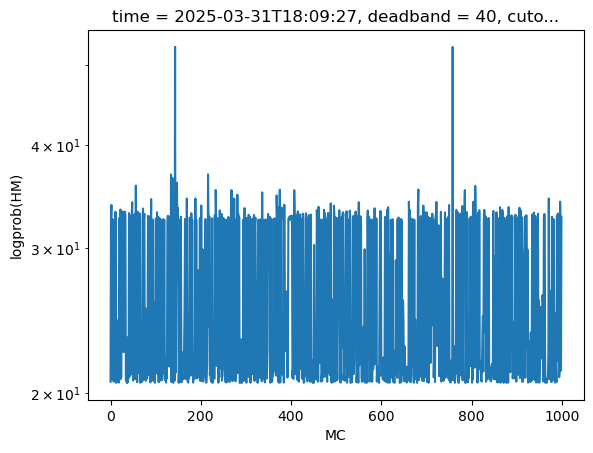

In [ ]:
(-ds.isel(time=0, deadband=4, cutoff=10)['logprob(HM)']).plot()
plt.yscale('log')
#plt.ylim(-10000000,0)

In [ ]:
import numpy as np

In [ ]:
time=1

In [ ]:
u_range = (ds.isel(time=time).quantile(0.9, skipna=True, dim=['MC'])['dcdt(HM)']-ds.isel(time=time).quantile(0.1, skipna=True, dim=['MC'])['dcdt(HM)']).values.flatten()

In [ ]:
logprob = ds.isel(time=time)['logprob(HM)'].median(dim=['MC']).values.flatten()

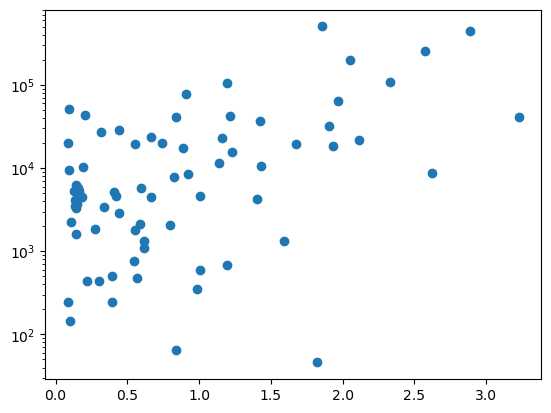

In [ ]:
plt.scatter(u_range, -logprob)
plt.yscale('log')

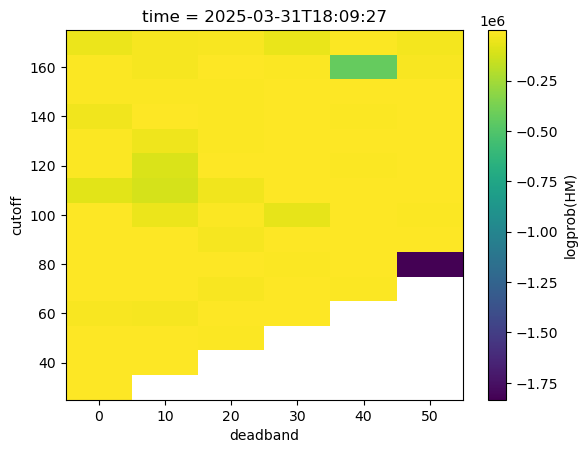

In [ ]:
ds.isel(time=0)['logprob(HM)'].median(dim=['MC']).plot()

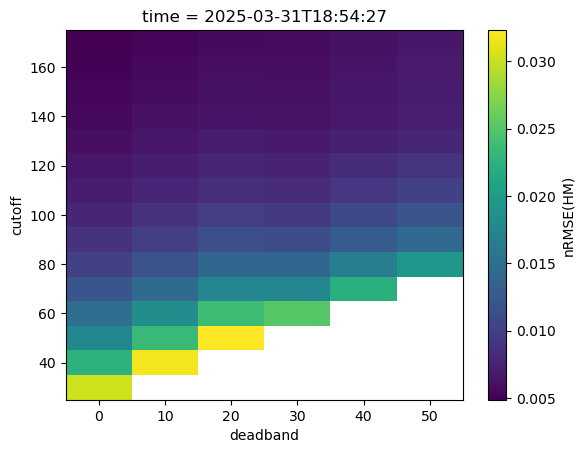

In [ ]:
ds.isel(time=15)['nRMSE(HM)'].plot()

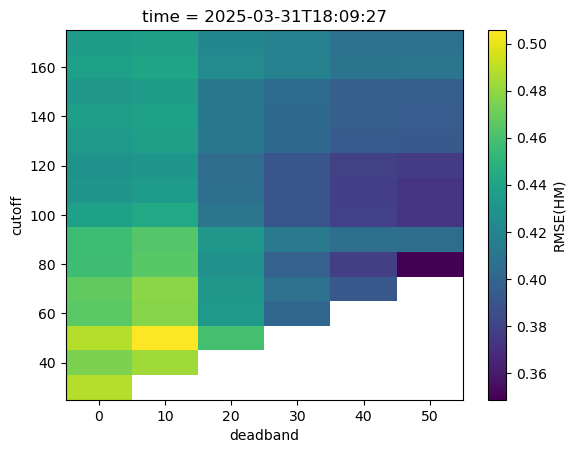

In [ ]:
ds.isel(time=0)['RMSE(HM)'].plot()

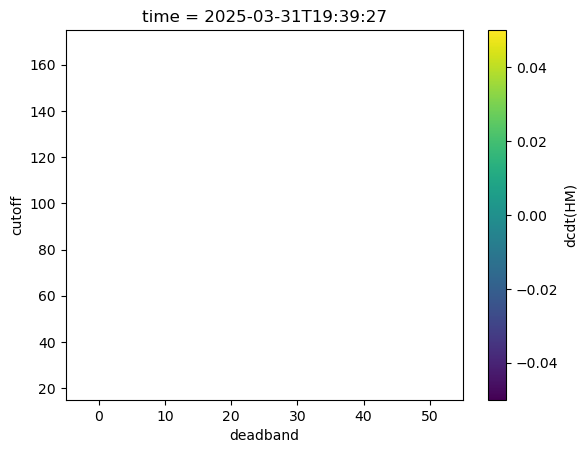

In [ ]:
ds.isel(time=30)['dcdt(HM)'].plot()